### 参考资料
- [ARCH ARCH Modeling](https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html)
- [PyFlux GARCH models](https://pyflux.readthedocs.io/en/stable/garch.html)
- [基于python的时间序列分析学习（二）](https://www.joinquant.com/post/9945)
- [Arch/Garch 模型 · 如何使用优矿进行 GARCH 模型分析](https://wizardforcel.gitbooks.io/python-quant-uqer/content/198.html)
- [Series Analysis (TSA) in Python - Linear Models to GARCH](http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016)


# ARCH demo

## Introduction to ARCH Models
 

In [7]:
import datetime as dt
import pandas_datareader.data as web
from arch import arch_model


import fix_yahoo_finance as yf
yf.pdr_override()
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2014, 1, 1)
data = web.get_data_yahoo('^GSPC', start=st, end=en)
returns = 100 * data['Adj Close'].pct_change().dropna()
figure = returns.plot()


[*********************100%***********************]  1 of 1 downloaded


In [52]:
res = am.fit()
print(res.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 8805.09097333272
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8801.83207093547
Iteration:      3,   Func. Count:     25,   Neg. LLF: 8799.594002769572
Iteration:      4,   Func. Count:     32,   Neg. LLF: 8793.121919303374
Iteration:      5,   Func. Count:     39,   Neg. LLF: 8791.774500116655
Iteration:      6,   Func. Count:     46,   Neg. LLF: 8788.581230542024
Iteration:      7,   Func. Count:     54,   Neg. LLF: 8788.346618821086
Iteration:      8,   Func. Count:     61,   Neg. LLF: 8788.309512820866
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8788.117638894022
Iteration:     10,   Func. Count:     74,   Neg. LLF: 8788.102549029685
Iteration:     11,   Func. Count:     80,   Neg. LLF: 8788.102397917199
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8788.10239791839
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11
 

Iteration:      1,   Func. Count:      9,   Neg. LLF: 9059.26584760558
Iteration:      2,   Func. Count:     24,   Neg. LLF: 9043.207736781986
Iteration:      3,   Func. Count:     38,   Neg. LLF: 9036.294096962207
Iteration:      4,   Func. Count:     50,   Neg. LLF: 9026.118707719774
Iteration:      5,   Func. Count:     62,   Neg. LLF: 8981.560148362627
Iteration:      6,   Func. Count:     71,   Neg. LLF: 8901.425789207042
Iteration:      7,   Func. Count:     81,   Neg. LLF: 8852.29959393281
Iteration:      8,   Func. Count:     92,   Neg. LLF: 8818.283021684794
Iteration:      9,   Func. Count:    102,   Neg. LLF: 8813.440142235904
Iteration:     10,   Func. Count:    113,   Neg. LLF: 8813.320598527658
Iteration:     11,   Func. Count:    122,   Neg. LLF: 8812.90390477263
Iteration:     12,   Func. Count:    131,   Neg. LLF: 8812.87753432208
Iteration:     13,   Func. Count:    140,   Neg. LLF: 8812.87704354574
Iteration:     14,   Func. Count:    149,   Neg. LLF: 8812.8770165404

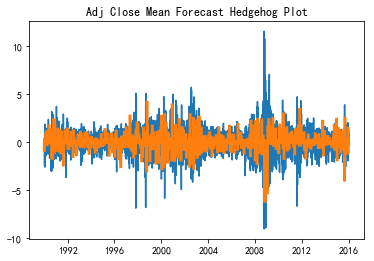

In [53]:
am = arch_model(returns, mean='AR', lags=2, vol='harch', p=[1, 5, 22])
res = am.fit()
fig = res.hedgehog_plot(type='mean')

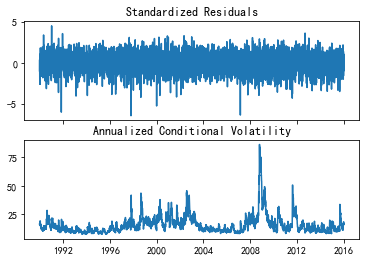

In [54]:
ig = res.plot(annualize='D')

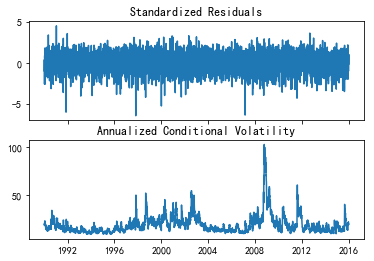

In [55]:
fig = res.plot(scale=360)

In [6]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90

### 例子 Setup


[*********************100%***********************]  1 of 1 downloaded


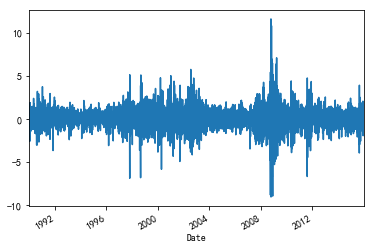

In [45]:
import datetime as dt
import pandas_datareader.data as web
import fix_yahoo_finance as yf
yf.pdr_override()
st = dt.datetime(1990,1,1)
en = dt.datetime(2016,1,1)
data = web.get_data_yahoo('^GSPC', start=st, end=en)
returns = 100 * data['Adj Close'].pct_change().dropna()
figure = returns.plot()

### Specifying Common Models


In [14]:
from arch import arch_model
am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     39,   Neg. LLF: 8791.774500116655
Iteration:     10,   Func. Count:     74,   Neg. LLF: 8788.102549029685
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8788.10239791839
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -8788.10
Distribution:                  Normal   AIC:                           17584.2
Method:            Maximum Likelihood   BIC:                           17611.4
                                        No. Observations:                 6552
Date:                Thu, Aug 16 2018   Df Residuals:                     6548
Time:          

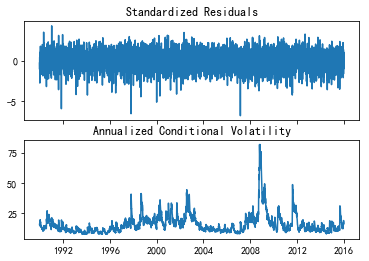

In [15]:
fig = res.plot(annualize='D')


### GJR-GARCH


In [16]:
am = arch_model(returns, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -8672.60
Distribution:                  Normal   AIC:                           17355.2
Method:            Maximum Likelihood   BIC:                           17389.1
                                        No. Observations:                 6552
Date:                Thu, Aug 16 2018   Df Residuals:                     6547
Time:                        17:26:24   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0254  9.751e-03      2.606  9.155e-03 [6.

### TARCH/ZARCH


In [17]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     50,   Neg. LLF: 8660.347560000835
Iteration:     10,   Func. Count:     91,   Neg. LLF: 8655.217828989951
Iteration:     15,   Func. Count:    127,   Neg. LLF: 8655.188029199726
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8655.188028254519
            Iterations: 15
            Function evaluations: 129
            Gradient evaluations: 15
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -8655.19
Distribution:                  Normal   AIC:                           17320.4
Method:            Maximum Likelihood   BIC:                           17354.3
                                        No. Observations:                 6552
Date:               

### Student’s T Errors


In [18]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0, dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())


Iteration:      5,   Func. Count:     55,   Neg. LLF: 8575.490623419613
Iteration:     10,   Func. Count:     99,   Neg. LLF: 8564.498265636803
Iteration:     15,   Func. Count:    145,   Neg. LLF: 8564.231489099788
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8564.231389601087
            Iterations: 16
            Function evaluations: 155
            Gradient evaluations: 16
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                    Adj Close   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -8564.23
Distribution:      Standardized Student's t   AIC:                           17140.5
Method:                  Maximum Likelihood   BIC:                           17181.2
                                              No. Observations:

### Fixing Parameters


In [19]:
fixed_res = am.fix([0.0235, 0.01, 0.06, 0.0, 0.9382, 8.0])
print(fixed_res.summary())

                      Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                     Adj Close   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                       TARCH/ZARCH   Log-Likelihood:               -8737.43
Distribution:       Standardized Student's t   AIC:                           17486.9
Method:            User-specified Parameters   BIC:                           17527.6
                                               No. Observations:                 6552
Date:                       Thu, Aug 16 2018                                         
Time:                               17:27:25                                         
      Mean Model     
                 coef
---------------------
mu             0.0235
   Volatility Model  
                 coef
---------------------
omega          0.0100
alpha[1]       0.0600
gamma[1]       0.0000
beta[1

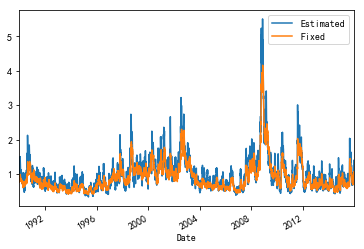

In [29]:
import pandas as pd
df = pd.concat([res.conditional_volatility,fixed_res.conditional_volatility],1)
df.columns = ['Estimated', 'Fixed']
df.plot()
plt.show()

### [Building a Model From Componentsp](https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html#Building-a-Model-From-Components)
- A mean model
- A volatility process (arch.volatility)
- A distribution (arch.distribution)

实际中就是将三者进行拼装即可

## Forecasting
- Analytical:  1-step ahead forecast
- Simulation
- Bootstrap


In [30]:
from arch import arch_model
import datetime as dt
import pandas_datareader.data as web
start = dt.datetime(2000,1,1)
end = dt.datetime(2014,1,1)
sp500 = web.get_data_yahoo('^GSPC', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')

[*********************100%***********************]  1 of 1 downloaded


In [31]:
split_date = dt.datetime(2010,1,1)
res = am.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3810.075240085753
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3807.775129333174
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3804.3267955433575
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3795.467745675299
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3788.6651861876344
Iteration:      6,   Func. Count:     45,   Neg. LLF: 3788.0394491852458
Iteration:      7,   Func. Count:     52,   Neg. LLF: 3787.1087636400425
Iteration:      8,   Func. Count:     59,   Neg. LLF: 3786.6516526752243
Iteration:      9,   Func. Count:     66,   Neg. LLF: 3786.3685979971415
Iteration:     10,   Func. Count:     73,   Neg. LLF: 3786.332179423172
Iteration:     11,   Func. Count:     80,   Neg. LLF: 3786.2971725876296
Iteration:     12,   Func. Count:     86,   Neg. LLF: 3786.2968346759867
Iteration:     13,   Func. Count:     92,   Neg. LLF: 3786.296789936634
Optimization terminated successfully.    (Exit mode 0)
 

### Analytical Forecasts


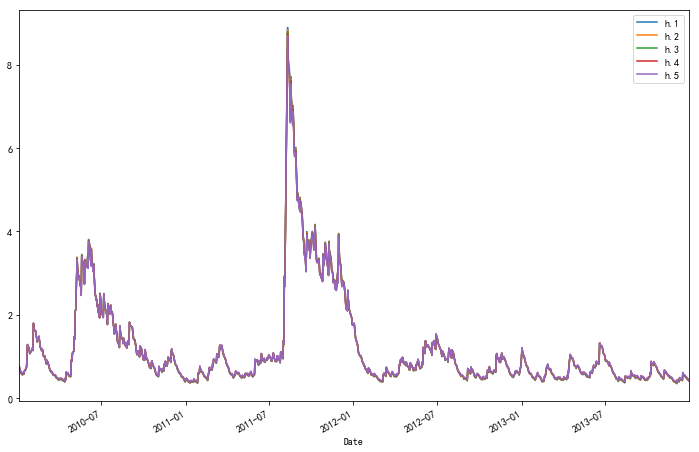

In [34]:
forecasts = res.forecast(horizon=5, start=split_date)
forecasts.variance[split_date:].plot(figsize=(12,8))

### Simulation Forecasts


In [35]:
forecasts = res.forecast(horizon=5, start=split_date, method='simulation')


# PyFlux例子

[*********************100%***********************]  1 of 1 downloaded


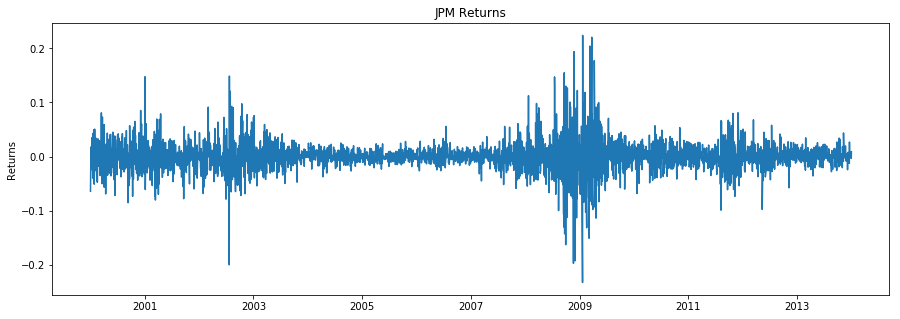

In [13]:
import numpy as np
import datetime as dt
import pandas_datareader.data as web
from arch import arch_model
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt


import fix_yahoo_finance as yf
yf.pdr_override()
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2014, 1, 1)
jpm = web.get_data_yahoo('JPM', start=start, end=end)
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns);
plt.ylabel('Returns');
plt.title('JPM Returns');
plt.show()

In [14]:
model = pf.GARCH(returns,p=1,q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: JPM Returns                         Method: MLE                                       
Start Date: 2000-01-04 00:00:00                         Log Likelihood: 8834.2366                         
End Date: 2013-12-31 00:00:00                           AIC: -17660.4733                                  
Number of observations: 3520                            BIC: -17635.8084                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

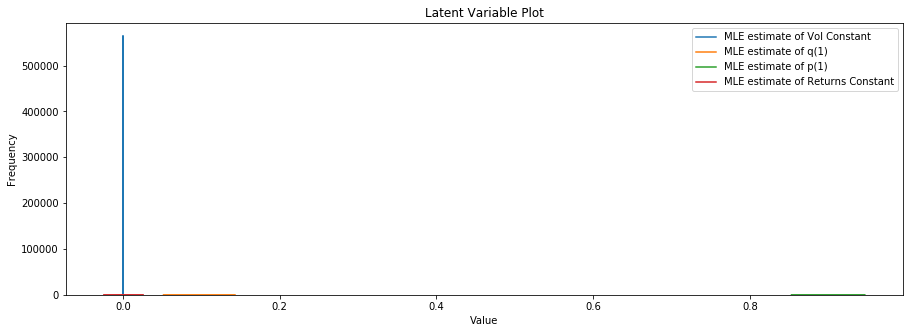

In [15]:
model.plot_z(figsize=(15,5))


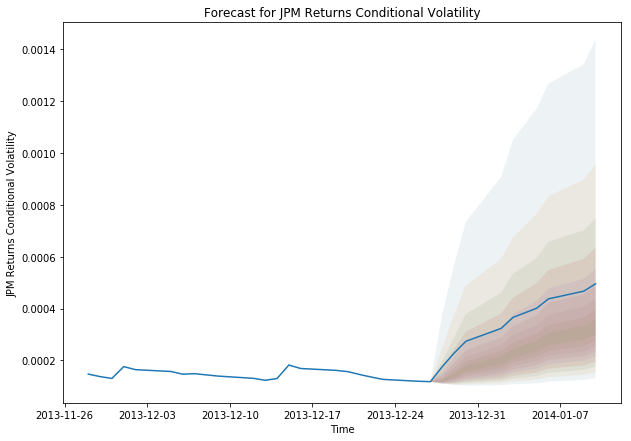

In [16]:
model.plot_predict(h=10)


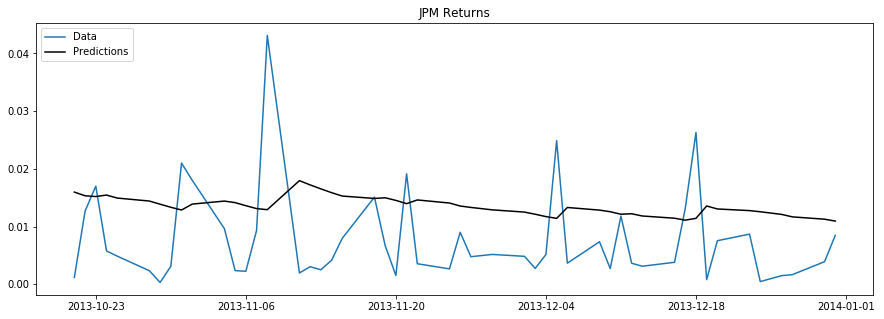

In [17]:
model.plot_predict_is(h=50,figsize=(15,5))


In [1]:
import datetime
import pandas as pd
import numpy as np
import os
import matplotlib as  mpl
from dateutil.relativedelta  import relativedelta
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号




习题数据="./习题与案例数据/习题数据/"
案例数据="./习题与案例数据/案例数据/"
from statsmodels.tsa.stattools import acf,pacf,adfuller
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA


/Users/pengju/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


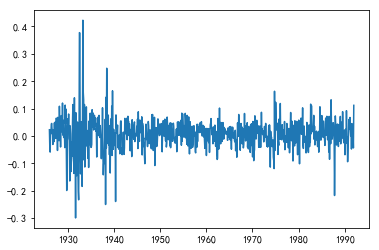

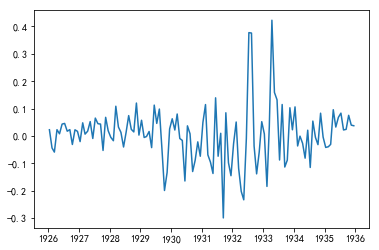

In [2]:
标普=pd.read_excel(os.path.join(案例数据,"附录1.23.xls"))
标普.columns=['Month','return']
标普.set_index("Month",inplace=True)
标普=标普['return']

plt.plot(标普)
plt.show()

plt.plot(标普.loc['1926-01-01':'1936-01-01'])
plt.show()